# Visualización de datos con Seaborn

Este tutorial es una adaptación al español del tutorial [Plot With Pandas: Python Data Visualization for Beginners](https://realpython.com/pandas-plot-python/) desarrollado por Reka Hovath en el portal Real Python.


Ya sea que estés conociendo un conjunto de datos o te estés preparando para publicar tus hallazgos, la visualización es una herramienta esencial. La popular biblioteca de análisis de datos de Python, pandas, ofrece varias opciones diferentes para visualizar sus datos con `.plot()`. Incluso si estás al comienzo de tu viaje de pandas, pronto estarás creando gráficos básicos que producirán información valiosa sobre tus datos.

En este tutorial, aprenderás:

- Cuáles son los diferentes tipos de plots de pandas y cuándo usarlos
- Cómo obtener una descripción general de tu conjunto de datos con un histograma
- Cómo descubrir la correlación con un diagrama de dispersión
- Cómo analizar diferentes categorías y sus proporciones.

## Preparativos
Primero, descarga los datos pasando la URL de descarga a `pandas.read_csv()`:


In [1]:
import pandas as pd

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(download_url)
type(df)

pandas.core.frame.DataFrame

Al llamar a `read_csv()`, creas un **DataFrame**, que es la estructura de datos principal utilizada en pandas.

>Nota: Puedes seguir este tutorial incluso si no estás familiarizado con DataFrames. Pero si está interesado en aprender más sobre cómo trabajar con pandas y DataFrames, puedes consultar [The Pandas DataFrame: Make Working With Data Delightful](https://realpython.com/pandas-dataframe/).

Ahora que tienes un DataFrame, puedes echar un vistazo a los datos. Primero, debes configurar la opción display.max.columns para asegurarte de que pandas no oculte ninguna columna. Luego puede ver las primeras filas de datos con .head():

In [2]:
pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


El número predeterminado de filas que muestra `.head()` es cinco, pero puedes especificar cualquier número de filas como argumento. Por ejemplo, para mostrar las primeras diez filas, puedes usar `df.head(10)`.

## Crea tu primera visualización con pandas
El conjunto de datos contiene algunas columnas relacionadas con los ingresos de los graduados en cada especialización:

- La "mediana" es la mediana de los ingresos de los trabajadores a tiempo completo durante todo el año.
- "P25th" es el percentil 25 de ganancias.
- "P75th" es el percentil 75 de ganancias.
- "Rank" es el ranking de la especialidad según la mediana de ingresos.

Comencemos con un gráfico que muestre estas columnas. Puedes hacerlo con `.plot()`:

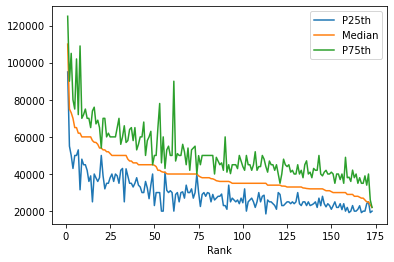

In [3]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"]);

`.plot()` devuelve un gráfico de líneas que contiene los datos de cada fila en el DataFrame. Los valores del eje x representan el ranking de cada institución, y los valores "P25th", "Median" y "P75th" están graficados en el eje y.

Al observar la gráfica puede hacer las siguientes observaciones:

- El ingreso medio disminuye a medida que disminuye el ranking. Esto se espera porque el ranking está determinado por el ingreso medio.

- Algunas carreras tienen grandes brechas entre los percentiles 25 y 75. Las personas con estos títulos pueden ganar significativamente menos o significativamente más que el ingreso medio.

- Otras carreras tienen brechas muy pequeñas entre los percentiles 25 y 75. Las personas con estos títulos ganan salarios muy cercanos al ingreso medio.

¡Tu primera visualización ya insinúa que hay mucho más por descubrir en los datos! Algunas carreras tienen una amplia gama de ingresos y otras tienen un rango bastante estrecho. Para descubrir estas diferencias, utilizarás varios otros tipos de gráficos.

`.plot()` tiene varios parámetros opcionales. En particular, el parámetro `kind` acepta once valores de cadena diferentes y determina qué tipo de gráfico creará:

- "area" es para parcelas de área.
- "bar" es para gráficos de barras verticales.
- "barh" es para gráficos de barras horizontales.
- "box" es para diagramas de caja.
- "hexbin" es para parcelas de hexbin.
- "hist" es para histogramas.
- "kde" es para gráficos de estimación de densidad de kernel.
- "density" es un alias de "kde".
- "line" es para gráficos de líneas.
- "pie" es para gráficos circulares.
- "scatter" es para diagramas de dispersión.

El valor predeterminado es "line". Los gráficos de líneas, como el que creó anteriormente, brindan una buena descripción general de sus datos. Puedes utilizarlos para detectar tendencias generales. Rara vez brindan información sofisticada, pero pueden darte pistas sobre dónde hacer zoom.

Si no proporciona un parámetro a `.plot()`, entonces crea una gráfica de línea con el índice en el eje x y todas las columnas numéricas en el eje y. Si bien este es un valor predeterminado útil para conjuntos de datos con solo unas pocas columnas, para el conjunto de datos de las especialidades universitarias y sus varias columnas numéricas, parece un desastre.

## Mira bajo el capó: Matplotlib
Cuando llamas a `.plot()` en un objeto DataFrame, Matplotlib crea la trama bajo el capó.

Para verificar esto, prueba dos fragmentos de código. Primero, crea una gráfica con Matplotlib usando dos columnas de su DataFrame:

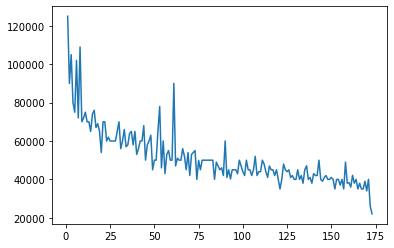

In [4]:
import matplotlib.pyplot as plt

plt.plot(df["Rank"], df["P75th"]);

Primero, importas el módulo `matplotlib.pyplot` y le cambias el nombre a `plt`. Luego, llamas a `plot()` y pasas la columna "Rank" del objeto DataFrame como primer argumento y la columna "P75th" como segundo argumento.Puede crear exactamente el mismo gráfico utilizando el método `.plot()` del objeto DataFrame:

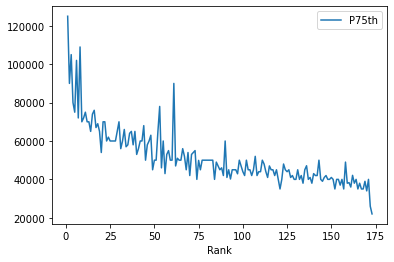

In [5]:
df.plot(x="Rank", y="P75th");

`.plot()` es un contenedor(**wrapper**) para `pyplot.plot()`, y el resultado es un gráfico idéntico al que se produjo con Matplotlib.

Puedes usar `pyplot.plot()` y `df.plot()` para producir el mismo gráfico a partir de columnas de un objeto DataFrame. Sin embargo, si ya tienes una instancia de DataFrame, `df.plot()` ofrece una sintaxis más limpia que `pyplot.plot()`.

Profundicemos ahora en los diferentes tipos de gráficos que puedes crear y cómo hacerlo.

## Explora tus datos

Los siguientes gráficos te brindarán una descripción general de una columna específica del conjunto de datos. Primero, verás la distribución de una propiedad con un histograma. Luego, conocerás algunas herramientas para examinar los valores atípicos.

## Distribuciones e histogramas
DataFrame no es la única clase en pandas con un método `.plot()`. Como sucede tan a menudo en pandas, el objeto **Serie** proporciona una funcionalidad similar.

Puedes obtener cada columna de un DataFrame como un objeto **Series**. A continuación, se muestra un ejemplo que utiliza la columna "Median" del DataFrame que creaste a partir de los datos de las carreras universitarias:

In [6]:
median_column = df["Median"]
type(median_column)

pandas.core.series.Series

Ahora que tienes un objeto Serie, puedes crear un gráfico para él. Un histograma es una buena forma de visualizar cómo se distribuyen los valores en un conjunto de datos. Los histogramas agrupan valores en bins (clases) y muestran un recuento de los puntos de datos cuyos valores están en un bin en particular. Creemos un histograma para la columna "Median":

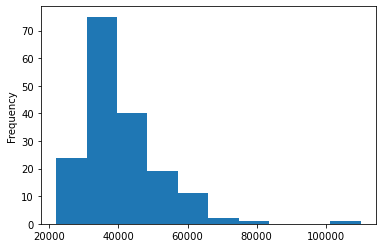

In [7]:
median_column.plot(kind="hist");

Llamas a `.plot()` en la serie `median_column` y pasas la cadena "hist" al parámetro `kind`. ¡Eso es todo!

El histograma muestra los datos agrupados en diez bins que van desde $20,000 a $120,000, y cada bin tiene un ancho de $ 10,000. El histograma tiene una forma diferente a la distribución normal, que tiene una forma de campana simétrica con un pico en el medio.

Sin embargo, el histograma de la mediana de los datos alcanza su punto máximo a la izquierda por debajo de los $ 40 000. La cola se extiende hacia la derecha y sugiere que, de hecho, hay campos en los que sus especialistas pueden esperar ganancias significativamente más altas.

## Valores atípicos
¿Has visto ese pequeño bin solitario en el borde derecho de la distribución? Parece que un punto de datos tiene su propia categoría. Los especialistas en este campo obtienen un salario excelente en comparación no solo con el promedio sino también con el segundo más alto. Aunque este no es su propósito principal, un histograma puede ayudarte a detectar un valor atípico. Investiguemos el valor atípico un poco más:

- ¿Qué especializaciones representan este valor atípico?
- ¿Qué tan grande es su borde?

A diferencia de la primera descripción general, solo deseas comparar algunos puntos de datos, pero deseas ver más detalles sobre ellos. Para esto, un diagrama de barras es una excelente herramienta. Primero, selecciona las cinco especialidades con las ganancias medias más altas. Necesitarás dos pasos:

- Para ordenar por la columna "Mediana", usa `.sort_values()` y proporciona el nombre de la columna por la que deseas ordenar, así como la dirección `ascendending=False`.
- Para obtener los cinco elementos principales de su lista, usa `.head()`.

Creemos un nuevo DataFrame llamado `top_5`:

In [8]:
top_5 = df.sort_values(by="Median", ascending=False).head()

Ahora tienes un DataFrame más pequeño que contiene solo las cinco carreras más lucrativas. Como siguiente paso, puedes crear un diagrama de barras que muestre solo las especialidades con estos cinco salarios medios:

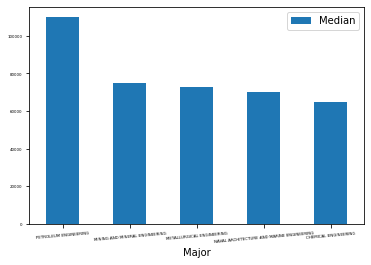

In [9]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4);

Observa que utilizas los parámetros `rot` y `fontsize` para rotar y cambiar el tamaño de las etiquetas del eje x para que sean visibles.

Este gráfico muestra que el salario medio de los especialistas en ingeniería petrolera es más de $ 20,000 más alto que el resto. Las ganancias para las carreras de segundo a cuarto lugar están relativamente cerca unas de otras.

Si tienes un punto de datos con un valor mucho más alto o más bajo que el resto, probablemente querrá investigar un poco más. Por ejemplo, puede mirar las columnas que contienen datos relacionados.

Investiguemos todas las especialidades cuyo salario medio es superior a 60.000 dólares. Primero, necesita filtrar estas especialidades con la máscara `df[df["Median"]>60000]`. Luego, puedes crear otro gráfico de barras que muestre las tres columnas de ingresos:

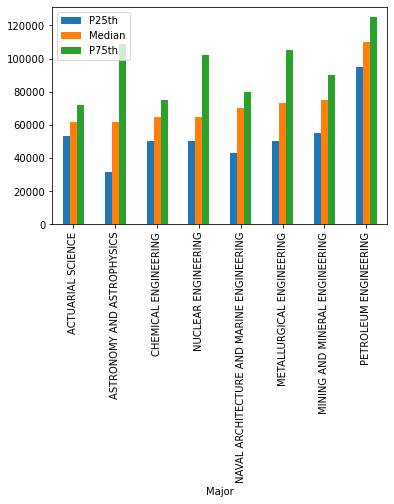

In [10]:
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar");

Los percentiles 25 y 75 confirman lo que has visto anteriormente: las carreras de ingeniería petrolera fueron, con mucho, los graduados recientes mejor pagados.

¿Por qué deberías estar tan interesado en los valores atípicos en este conjunto de datos? Si eres un estudiante universitario y estás pensando en qué especialidad elegir, tienes al menos una razón bastante obvia. Pero los valores atípicos también son muy interesantes desde el punto de vista del análisis. Pueden indicar no solo industrias con abundancia de dinero, sino también datos inválidos.

Los datos no válidos pueden deberse a cualquier número de errores o descuidos, incluida una interrupción del sensor, un error durante la entrada manual de datos o un niño de cinco años que participa en un grupo focal destinado a niños de diez años o más. La investigación de valores atípicos es un paso importante en la limpieza de datos.

## Buscar correlaciones
A menudo, deseas ver si dos columnas de un conjunto de datos están conectadas. Si eliges una especialización con ingresos medios más altos, ¿también tienes una menor probabilidad de desempleo? Como primer paso, crea un diagrama de dispersión con esas dos columnas:

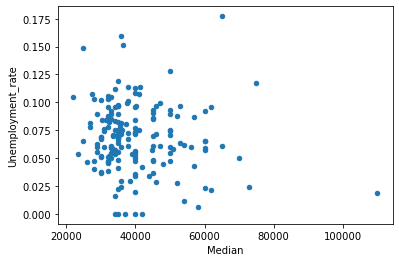

In [11]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter");

Un vistazo rápido a esta figura muestra que no existe una correlación significativa entre los ingresos y la tasa de desempleo.

Si bien un diagrama de dispersión es una herramienta excelente para obtener una primera impresión sobre una posible correlación, ciertamente no es una prueba definitiva de una conexión. Para obtener una descripción general de las correlaciones entre diferentes columnas, puedes usar `.corr()`. Si sospechas una correlación entre dos valores, entonces tienes varias herramientas a tu disposición para verificar su corazonada y medir qué tan fuerte es la correlación.

## Analizar datos categóricos
Para procesar grandes cantidades de información, la mente humana, consciente e inconscientemente, clasifica los datos en categorías. Esta técnica suele ser útil, pero está lejos de ser perfecta.

A veces ponemos las cosas en una categoría que, tras un examen más detenido, no es tan similar. En esta sección, conocerás algunas herramientas para examinar categorías y verificar si una determinada categorización tiene sentido.

Muchos conjuntos de datos ya contienen alguna categorización explícita o implícita. En el ejemplo actual, las 173 especialidades se dividen en 16 categorías.

### Agrupamiento
Un uso básico de las categorías es la agrupación y la agregación. Puedes usar `.groupby()` para determinar qué tan populares son cada una de las categorías en el conjunto de datos principal de la universidad:

In [12]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

Con `.groupby()`, creas un objeto `DataFrameGroupBy`. Con `.sum()`, creas una `Serie`.

Dibujemos un diagrama de barras horizontales que muestre todos los totales de categoría en `cat_totals`:

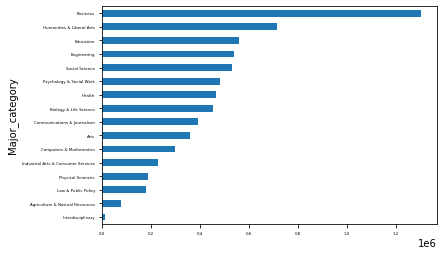

In [13]:
cat_totals.plot(kind="barh", fontsize=4);

Como muestra el gráfico, `Business` es de lejos la categoría principal más popular. Si bien `Humanities & Liberal Arts` es el segundo el resto de los campos son más similares en popularidad.

### Determinación de ratios
Los gráficos de barras verticales y horizontales suelen ser una buena opción si deseas ver la diferencia entre sus categorías. Si estás interesado en las proporciones, los gráficos circulares son una herramienta excelente. Sin embargo, dado que cat_totals contiene algunas categorías más pequeñas, la creación de un gráfico circular con cat_totals.plot (kind = "pie") producirá varios cortes diminutos con etiquetas superpuestas.

Para abordar este problema, puedes agrupar las categorías más pequeñas en un solo grupo. Combine todas las categorías con un total inferior a 100.000 en una categoría llamada "Other", luego crea un gráfico circular:

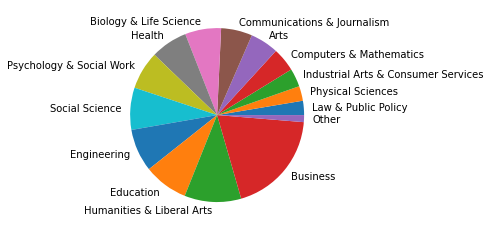

In [14]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]
# Añadir una nueva categoría "Other" con la suma de las categorías pequeñas
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="");

La categoría "Others" todavía constituye solo una pequeña porción del pastel. Esa es una buena señal de que fusionar esas categorías pequeñas fue la elección correcta.

### Acercar las categorías
A veces, también deseas verificar si una determinada categorización tiene sentido. ¿Los miembros de una categoría son más similares entre sí que al resto del conjunto de datos? Una vez más, una distribución es una buena herramienta para obtener una primera descripción general. Generalmente, esperamos que la distribución de una categoría sea similar a la distribución normal pero tenga un rango más pequeño.

Crea un histograma que muestre la distribución de las ganancias medias para los estudiantes de ingeniería:

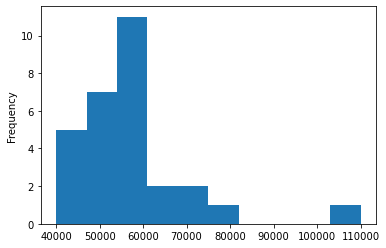

In [15]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist");

El rango de las principales ganancias medianas es algo más pequeño, comenzando en $ 40,000. La distribución es más cercana a la normal, aunque su pico todavía está a la izquierda. Por lo tanto, incluso si has decidido elegir una especialización en la categoría de ingeniería, sería prudente profundizar y analizar tus opciones más a fondo.

Si tienes tiempo, te invito a revisar el siguiente [tutorial](https://ourcodingclub.github.io/tutorials/pandas-python-intro/) y la [documentación de visualización de Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).